In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np

In [4]:
data=pd.read_csv("/content/drive/MyDrive/outlier/after_cleansing_with_likes.csv")
data.head()


,Unnamed: 0,comment,num_likes
0,0,한두 명만 들여라,0
1,1,정우성이 수용하면 되겠네,0
2,2,환대하시는 분들 집에 거주하게 하면 어떨지요 이슬람 종교색이 너무 강하다 절대 안 된다,0
3,3,왜 환대를 해야 하는지는 모르겠음 미군 감시하에 이탈 없이 지내면 상관없음 괜히 탈...,4
4,4,우리 허락받고 논의해야 될 문제를 자기들 책임지기 싫어서 동맹국한테 떠넘기기 하네 ...,3


In [5]:
range(len(data["comment"]))

range(0, 4971)

# 정수 인코딩과 단어 집합 만들기

In [11]:
kkma.nouns(data["comment"][1])

['정우', '수용']

In [12]:
#!pip install konlpy
from konlpy.tag import Kkma  
kkma = Kkma()
tokenized_doc=[]
for n in range(len(data["comment"])):
    text = data["comment"][n]
    tokenized_doc.append(list(kkma.nouns(str(text))))
print(tokenized_doc[:5])

[['명', '라'], ['정우', '수용'], ['환대', '분', '집', '거주', '이슬람', '종교', '종교색', '색', '절대'], ['환대', '미군', '감', '감시하', '시하', '이탈', '탈출', '코란', '칼', '설치', '반대', '반대임', '임'], ['우리', '허락', '논의', '문제', '자기', '동맹국', '넘기기', '하', '아프간', '전쟁', '참여', '어린아이', '일', '책임', '전가', '전가하나', '하나', '미국', '주위', '정상인', '국가']]


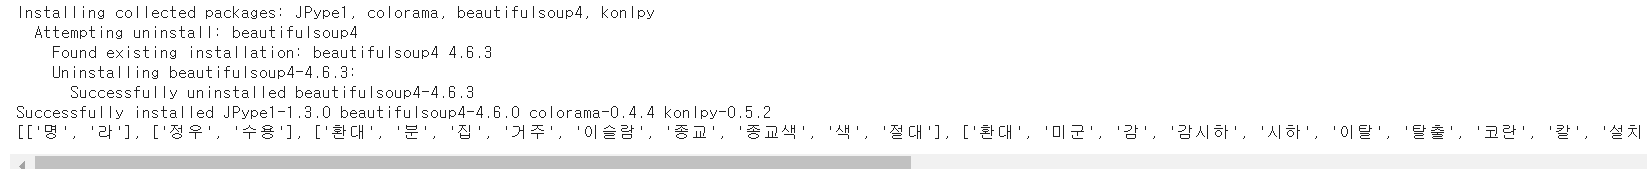

이제 각 단어에 정수 인코딩을 하는 동시에, 각 뉴스에서의 단어의 빈도수를 기록. 여기서는 각 단어를 (word_id, word_frequency)의 형태로 바꾸고자 합니다. word_id는 단어가 정수 인코딩된 값이고, word_frequency는 해당 뉴스에서의 해당 단어의 빈도수를 의미합니다. 이는 gensim의 corpora.Dictionary()를 사용하여 손쉽게 구할 수 있습니다. 전체 뉴스에 대해서 정수 인코딩을 수행하고, 두번째 댓글을 추출합니다.

In [46]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1])#두번째 댓글 출력

[(2, 1), (3, 1)]


두번째 댓글인 ['정우성이 수용하면 되겠네']에서 명사 추출한 ['정우','수용']에서 단어아이디가 2,3인 정우와 수용이 한번씩 등장

In [16]:
tokenized_doc[1]

['정우', '수용']

In [19]:
print(corpus[:30])#30개의 댓글 출력

[[(0, 1), (1, 1)], [(2, 1), (3, 1)], [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)], [(12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(3, 1), (7, 1), (9, 1), (12, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)], [(11, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(7, 1), (9, 1), (29, 1), (33, 1), (51, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1)], [(71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1)], [(0, 1), (8, 1), (38, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1)], [(7, 1), (90, 1

총 학습된 단어의 개수를 확인

In [20]:
len(dictionary) #8340개 단어가 학습

8340

# 조사포함일경우 정수 인코딩 해석

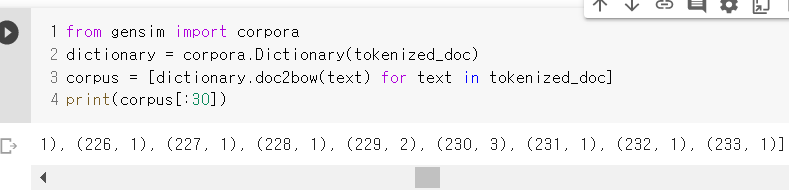

위의 출력 결과 중에서 (229, 2)는 정수 인코딩이 229으로 할당된 단어가 두 번 (230, 3)는 정수 인코딩이 230으로 할당된 단어가 세번 등장하였음을 의미합니다. 229와 230이라는 값을 가지는 단어가 정수 인코딩이 되기 전에는 어떤 단어였는지 확인하여봅시다. 이는 dictionary[]에 기존 단어가 무엇인지 알고자하는 정수값을 입력하여 확인할 수 있습니다.

In [ ]:
print(dictionary[229],",",dictionary[230],",",dictionary[234],",",dictionary[310])

말이다 , 반대다 , 난민을 , 받자고


#  LDA 모델을 훈련

각 단어 앞에 붙은 수치는 단어의 해당 토픽에 대한 기여도를 보여줍니다. 또한 맨 앞에 있는 토픽 번호는 0부터 시작하므로 총 20개의 토픽은 0부터 19까지의 번호가 할당되어져 있습니다. passes는 알고리즘의 동작 횟수를 말하는데, 알고리즘이 결정하는 토픽의 값이 적절히 수렴할 수 있도록 충분히 적당한 횟수를 정해주면 됩니다. 여기서는 총 15회를 수행하였습니다. 여기서는 num_words=4로 총 4개의 단어만 출력하도록 하였습니다. 만약 10개의 단어를 출력하고 싶다면 아래의 코드를 수행하면 됩니다.

In [21]:
import gensim
NUM_TOPICS = 20 #20개의 토픽(카테고리), k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.068*"난민" + 0.066*"반대" + 0.052*"이슬람" + 0.036*"절대"')
(1, '0.027*"불법" + 0.026*"해" + 0.023*"체류자" + 0.019*"불법체류자"')
(2, '0.018*"씨" + 0.013*"봉사" + 0.012*"생각" + 0.012*"거"')
(3, '0.040*"나라" + 0.035*"한국" + 0.025*"아프간" + 0.022*"거"')
(4, '0.037*"미군" + 0.018*"미국" + 0.016*"기지" + 0.014*"난민"')
(5, '0.032*"우리" + 0.021*"나라" + 0.018*"사람" + 0.016*"반대"')
(6, '0.028*"마라" + 0.026*"이슬람" + 0.020*"개소리" + 0.020*"난민"')
(7, '0.027*"도" + 0.024*"난민" + 0.015*"제주" + 0.013*"제주도"')
(8, '0.016*"한국" + 0.013*"전" + 0.012*"원" + 0.011*"4"')
(9, '0.028*"레" + 0.028*"문" + 0.025*"반" + 0.024*"레반"')
(10, '0.100*"우리" + 0.079*"나라" + 0.055*"우리나라" + 0.040*"난민"')
(11, '0.030*"무엇" + 0.029*"한국" + 0.020*"거" + 0.015*"사람"')
(12, '0.036*"레" + 0.035*"반" + 0.034*"협력자" + 0.029*"한국"')
(13, '0.028*"이슬람" + 0.022*"교" + 0.019*"이슬람교" + 0.014*"라"')
(14, '0.014*"마" + 0.012*"인" + 0.012*"이슬람" + 0.011*"국가"')
(15, '0.052*"민국" + 0.052*"대한" + 0.051*"대한민국" + 0.018*"난민"')
(16, '0.023*"미국" + 0.021*"년" + 0.018*"20" + 0.016*"국민"')
(17, '0.026*"듯" + 0.018*"

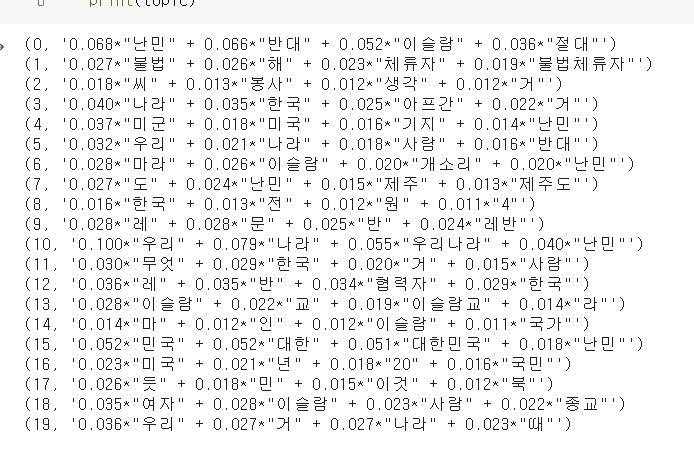

In [22]:
print(ldamodel.print_topics())

[(0, '0.068*"난민" + 0.066*"반대" + 0.052*"이슬람" + 0.036*"절대" + 0.030*"수용" + 0.025*"종교" + 0.022*"문제" + 0.021*"무슬림" + 0.019*"사람" + 0.016*"찬성"'), (1, '0.027*"불법" + 0.026*"해" + 0.023*"체류자" + 0.019*"불법체류자" + 0.018*"라" + 0.015*"시위" + 0.014*"추방" + 0.012*"해라" + 0.011*"범죄" + 0.009*"전부"'), (2, '0.018*"씨" + 0.013*"봉사" + 0.012*"생각" + 0.012*"거" + 0.011*"노동자" + 0.011*"대" + 0.010*"인구" + 0.010*"내가" + 0.009*"해결" + 0.008*"임"'), (3, '0.040*"나라" + 0.035*"한국" + 0.025*"아프간" + 0.022*"거" + 0.021*"자기" + 0.017*"우리" + 0.016*"생각" + 0.015*"일" + 0.014*"너희" + 0.013*"사람"'), (4, '0.037*"미군" + 0.018*"미국" + 0.016*"기지" + 0.014*"난민" + 0.013*"조" + 0.012*"군" + 0.009*"이슬람" + 0.008*"파병" + 0.008*"한국" + 0.008*"바"'), (5, '0.032*"우리" + 0.021*"나라" + 0.018*"사람" + 0.016*"반대" + 0.015*"결사" + 0.013*"결사반대" + 0.013*"이슬람" + 0.011*"거" + 0.010*"국민" + 0.010*"난민"'), (6, '0.028*"마라" + 0.026*"이슬람" + 0.020*"개소리" + 0.020*"난민" + 0.018*"나라" + 0.018*"자국민" + 0.018*"라" + 0.013*"미국" + 0.013*"법" + 0.012*"누구"'), (7, '0.027*"도" + 0.024*"난민" + 0.015*"제주" + 0.0

In [23]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 4.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 59 kB/s 
     |████████████████████████████████| 11.3 MB 37.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=ecdcede3f6bd0ddd59a2a3da62d4ca62ce7e9a5e61d0bb6b231f49b90ef77167
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [40]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

TypeError: ignored

# 문서 관점에서 topic과 document 알기(문서별 토픽 분포 보기)

토픽별 단어 분포는 위에서 확인하였음. 문서별 토픽 분포에 대해 확인을 위해 이미 훈련된 LDA모델인 ldamodel[]에 전체 데이터가 정수 인코딩 된 결과를 넣은 후 확인 가능. 

상위 5개의 문서에 대해서만 토픽분포 확인

In [43]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.016666668), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.68333334), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.016666668)]
1 번째 문서의 topic 비율은 [(0, 0.68333334), (1, 0.016666668), (2, 0.016666668), (3, 0.016666668), (4, 0.016666668), (5, 0.016666668), (6, 0.016666668), (7, 0.016666668), (8, 0.016666668), (9, 0.016666668), (10, 0.016666668), (11, 0.016666668), (12, 0.016666668), (13, 0.016666668), (14, 0.016666668), (15, 0.016666668), (16, 0.016666668), (17, 0.016666668), (18, 0.016666668), (19, 0.016666668)]
2 번째 문서의 topic 비율은 [(0, 0.70317024), (16, 0.20682979)]
3 번째 문서의 topic 비율은 [(4, 0.06829039), (5, 0.115512185), (16, 0.083235845), (17, 0.34840965), (19, 0.3309805)]
4 번째 문서의 topic 비율은 [(3, 0.95681816)]


위의 출력 결과에서 (숫자, 확률)은 토픽 번호와 해당토픽이 해당문서에서 차지하는 분포도를 의미.예를 들어 2번째 문서의 토픽 비율에서 (0, 0.70317024)은 0번 토픽이 70%의 분포도를 가지는 것을 의미

좀 더 깔끔한 형태의 데이터프레임 형식으로 출력

In [41]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [42]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index() # 문서 번호을 의미하는 열(column)로 사용하기 위해서 인덱스 열을 하나 더 만든다.
topictable.columns = ['문서 번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,9.0,0.6833,"[(0, 0.016666668), (1, 0.016666668), (2, 0.016..."
1,1,0.0,0.6833,"[(0, 0.68333334), (1, 0.016666668), (2, 0.0166..."
2,2,0.0,0.7032,"[(0, 0.70317006), (16, 0.20682995)]"
3,3,17.0,0.3484,"[(4, 0.068289466), (5, 0.115638025), (16, 0.08..."
4,4,3.0,0.9568,"[(3, 0.95681816)]"
5,5,0.0,0.7023,"[(0, 0.7022912), (12, 0.24476758)]"
6,6,15.0,0.4454,"[(1, 0.20340697), (10, 0.24494405), (15, 0.445..."
7,7,18.0,0.7516,"[(6, 0.17920804), (18, 0.75156116)]"
8,8,6.0,0.3356,"[(4, 0.2500945), (6, 0.33561978), (8, 0.292857..."
9,9,13.0,0.7103,"[(0, 0.06429267), (3, 0.186793), (13, 0.710278..."


# 단어 관점에서topic과 documents를 알기


In [48]:
# 이슬람,종교에 관련된 토픽을 찾기. id:16 -> '이슬람',id:17->'종교'
term16_topic_dist = ldamodel.get_term_topics(16, minimum_probability=0)
sorted_term_topic = sorted(term16_topic_dist, key=lambda x:x[1], reverse=True)
sorted_term_topic

[(0, 0.06612897),
 (5, 0.015555432),
 (19, 0.0064206743),
 (16, 0.0013589043),
 (10, 1.2510964e-05),
 (7, 1.5946018e-06)]

In [49]:
term17_topic_dist = ldamodel.get_term_topics(17, minimum_probability=0)
sorted_term_topic = sorted(term17_topic_dist, key=lambda x:x[1], reverse=True)
sorted_term_topic

[(19, 0.0015026873)]

종교보다 이슬람이 더 언급되어 토픽과 관련성이 높은것으로 보임
이슬람과 관련된 토픽은 0번째 토픽과 관련이 높음

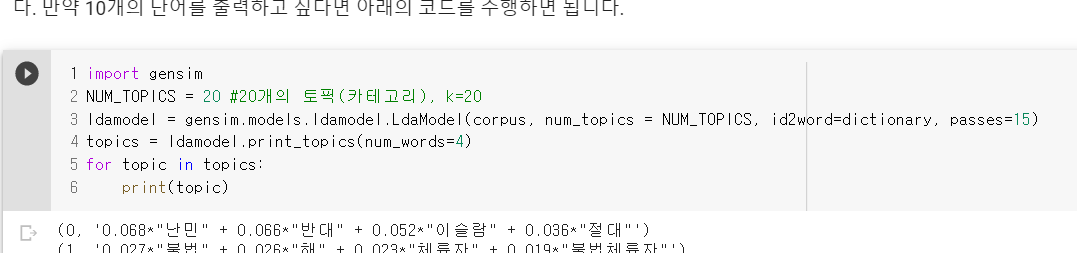

위의 단어별 토픽 기여도를 보았을때 이슬람과 관련이 깊은 0번째 토픽은 '난민','반대','절대'와 관련이 높고 이들은 이슬람이라는 단어와 연관성이 높은 것을 알수 있습니다.